In [ ]:
#Importing the necessary librariers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df = pd.read_excel('/content/Online Retail Data Set.xlsx')

In [ ]:
df['Total_sales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
#Displaying the first 5 lines of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Total_sales  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [ ]:
#Describing the dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_sales
count,541909.000000,541909,541909.000000,406829.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,378.810824


In [ ]:
#Total number of null values in the dataset
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total_sales         0
dtype: int64

In [ ]:
#Imputing the null values by KNN Method
from sklearn.impute import KNNImputer

impute_cols = ['Description','CustomerID']
impute_df = df[impute_cols]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
impute_df['Description'] = impute_df['Description'].astype(str)
impute_df['Description'] = le.fit_transform(impute_df['Description'])

impute_df['CustomerID'] = impute_df['CustomerID'].fillna(-1).astype(int)
impute_df['CustomerID'] = le.fit_transform(impute_df['CustomerID'])
imputer = KNNImputer()

impute_df_filled = imputer.fit_transform(impute_df)
impute_df_filled = pd.DataFrame(impute_df_filled, columns=impute_cols)
impute_df_filled.head()

df[impute_cols] = impute_df_filled
df.head()

<ipython-input-8-4671f0d8e729>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impute_df['Description'] = impute_df['Description'].astype(str)
<ipython-input-8-4671f0d8e729>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impute_df['Description'] = le.fit_transform(impute_df['Description'])
<ipython-input-8-4671f0d8e729>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,3918.0,6,2010-12-01 08:26:00,2.55,4049.0,United Kingdom,15.30
1,536365,71053,3926.0,6,2010-12-01 08:26:00,3.39,4049.0,United Kingdom,20.34
2,536365,84406B,913.0,8,2010-12-01 08:26:00,2.75,4049.0,United Kingdom,22.00
3,536365,84029G,1910.0,6,2010-12-01 08:26:00,3.39,4049.0,United Kingdom,20.34
4,536365,84029E,2911.0,6,2010-12-01 08:26:00,3.39,4049.0,United Kingdom,20.34


In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total_sales    0
dtype: int64

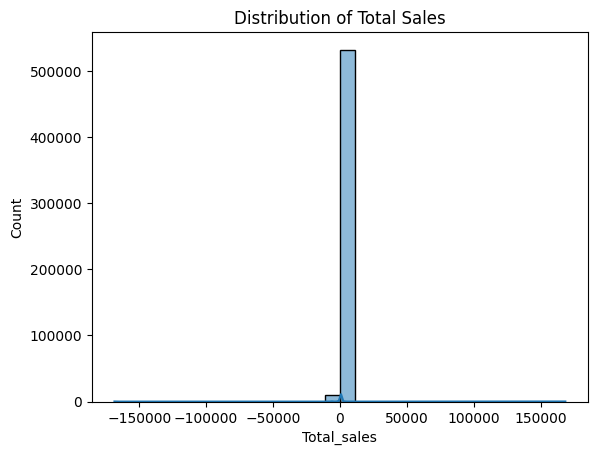

In [ ]:
#Histogram plot of Total Sales
sns.histplot(df['Total_sales'],bins=30,kde=True)
plt.title("Distribution of Total Sales")
plt.show()

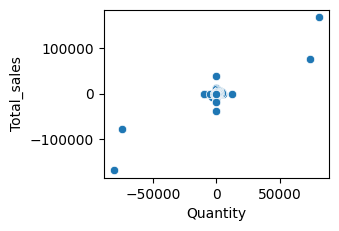

In [ ]:
#Total sales v/s Quantity
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Quantity', y='Total_sales')
plt.show()

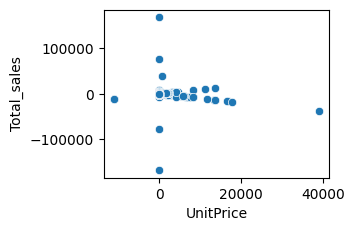

In [ ]:
#Total sales v/s UnitPrice
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='UnitPrice',y='Total_sales')
plt.show()

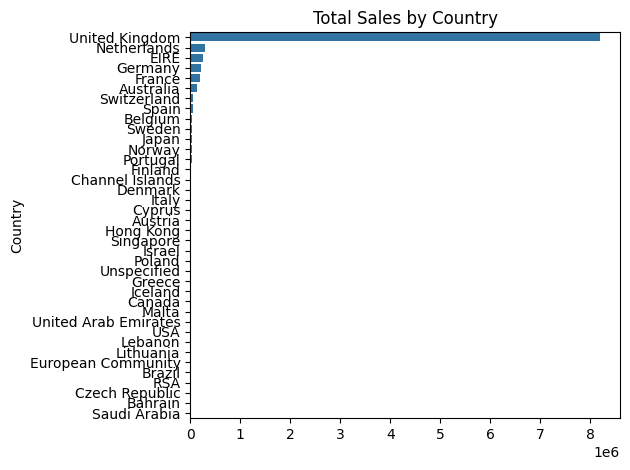

In [ ]:
#Displaying the total sales by each country
total_sales_by_each_country = df.groupby('Country')['Total_sales'].sum().sort_values(ascending=False)
sns.barplot(x=total_sales_by_each_country.values, y = total_sales_by_each_country.index)
plt.title('Total Sales by Country')

plt.tight_layout()
plt.show()

In [ ]:
#Splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split

features = df[[ 'Quantity','UnitPrice','CustomerID']]
target = df['Total_sales']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=42)

In [ ]:
#Applying the Ml algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
models={
    'linear regression':LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Decision Tree' : DecisionTreeRegressor()
}

for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  print(f"**{name}**\n")
  print(f"MSE: {mse:.2f}")
  print(f"MAE: {mae:.2f}")
  print(f"R-squared: {r2:.2f}")
  print('-'*30)

**linear regression**

MSE: 46293.61
MAE: 17.32
R-squared: 0.80
------------------------------
**Random Forest**

MSE: 101926.76
MAE: 1.62
R-squared: 0.56
------------------------------
**Decision Tree**

MSE: 121099.37
MAE: 2.03
R-squared: 0.48
------------------------------


In [ ]:
#Applying the Hyper parameter tuning with GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best R^2 score: ", grid_search.best_score_)

In [ ]:
#Applying the Hyper parameter tuning with GridSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Perform Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best R^2 score: ", random_search.best_score_)

In [ ]:

model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best R^2 score: ", grid_search.best_score_)

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Perform Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best R^2 score: ", random_search.best_score_)